In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# plt.rc('font', size=30)          # controls default text sizes
# plt.rc('axes', titlesize=49)     # fontsize of the axes title
plt.rc('axes', labelsize=29)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
# plt.rc('figure', titlesize=30)  # fontsize of the figure title


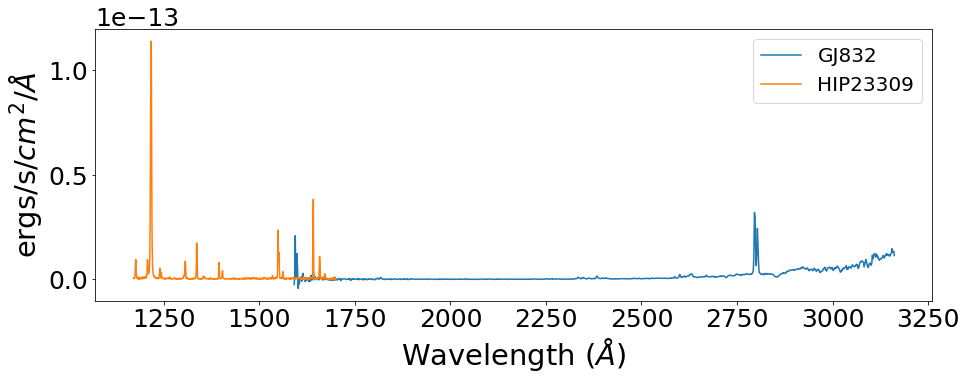

In [42]:

filename1 = "~/UVIT_HIP23309/hlsp_muscles_hst_stis_gj832_g230l_v22_component-spec.fits"
gj832 = fits.getdata(filename2,1)

file = "~/UVIT_HIP23309/HIP23309_HST_FUVl.txt"
hip_hst = pd.read_csv(file, names=['wavelength', 'flux', 'err'])


fig = plt.figure(1, figsize=(15,5))
plt.plot(gj832['WAVELENGTH'],gj832['FLUX'], label='GJ832')
plt.plot(hip_hst['wavelength'], hip_hst['flux'], label='HIP23309')
plt.xlabel('Wavelength $(\\AA)$')
plt.ylabel('ergs/s/$cm^2$/$\\AA$')
# plt.xlim(2780,2820)
# plt.ylim(-0.5e-12,2.0e-12)
plt.legend()
plt.show()



# UVIT spectra of HIP23309

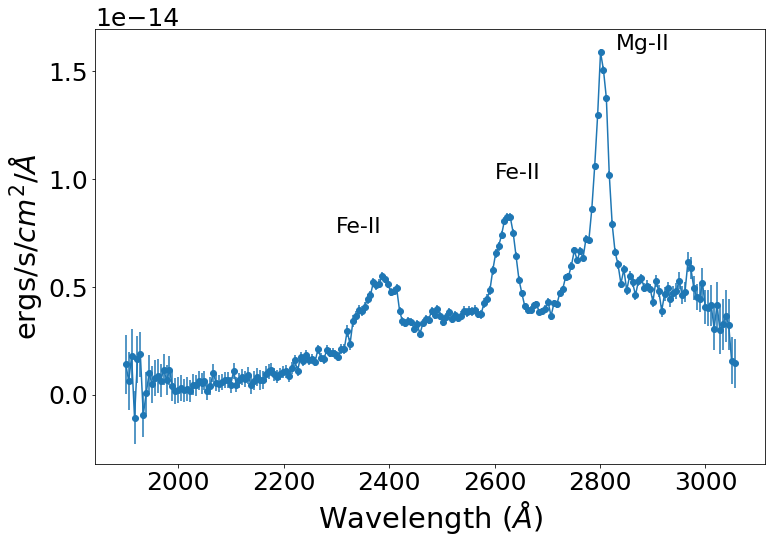

In [43]:
HIP23309_NUV = pd.read_csv("~/UVIT_HIP23309/HIP23309_NUV_T01_207T01_9000001720_NUV_Gratingm1_cross_disp_50pixels_spec.dat",
                          delimiter='\s+', names=['lambda', 'flux', 'flux_err'])

# HIP23309_NUV.to_csv('HIP23309_NUV_UVIT.csv', index=False)

plt.figure(1, figsize=(12,8), facecolor='white')
plt.scatter(HIP23309_NUV['lambda'], HIP23309_NUV['flux'])
plt.errorbar(HIP23309_NUV['lambda'], HIP23309_NUV['flux'], yerr=HIP23309_NUV['flux_err'])
# plt.xlim(1250,1750)
plt.text(2830, 1.6e-14, 'Mg-II', fontsize = 22)
plt.text(2600, 1.0e-14, 'Fe-II', fontsize = 22)
plt.text(2300, 0.75e-14, 'Fe-II', fontsize = 22)
plt.xlabel('Wavelength $(\\AA)$')
plt.ylabel('ergs/s/$cm^2$/$\\AA$')
plt.savefig('HIP23309_NUV_spectra.png')

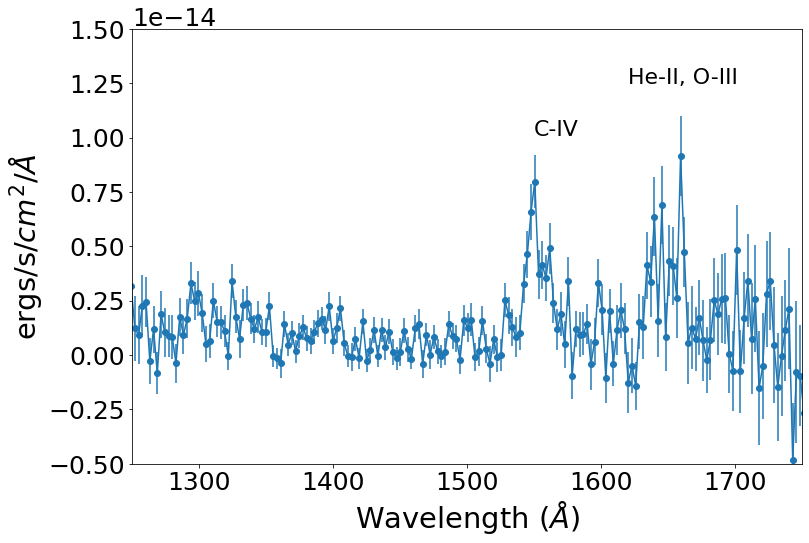

In [44]:
HIP23309_FUV = pd.read_csv("~/UVIT_HIP23309/HIP23309_FUV_T01_207T01_9000001720_FUV_Grating1m2_crossdisp_50pixels_spec.dat",
                          delimiter='\s+', names=['lambda', 'flux', 'flux_err'])


# HIP23309_FUV.to_csv('HIP23309_FUV_UVIT.csv', index=False)


plt.figure(1, figsize=(12,8), facecolor='white')
plt.scatter(HIP23309_FUV['lambda'], HIP23309_FUV['flux'])
plt.errorbar(HIP23309_FUV['lambda'], HIP23309_FUV['flux'], yerr=HIP23309_FUV['flux_err'])
plt.xlim(1250,1750)
plt.ylim(-0.5e-14,1.5e-14)
plt.text(1620, 1.25e-14, 'He-II, O-III', fontsize = 22)
plt.text(1550, 1.01e-14, 'C-IV', fontsize = 22)
# plt.text(1330, 6.6e-16, 'C-II', fontsize = 22)
plt.xlabel('Wavelength $(\\AA)$')
plt.ylabel('ergs/s/$cm^2$/$\\AA$')
plt.savefig('HIP23309_FUV_spectra.png')

# Degrading a Spectrum to Lower Resolution

In [13]:
import coronagraph as cg
print(cg.__version__)


1.01


(2200.0, 2950.0)

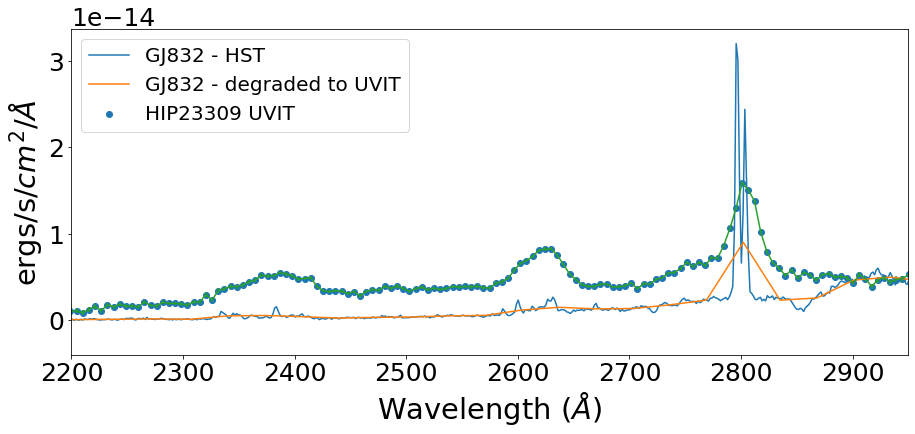

In [19]:
lam = (gj832['WAVELENGTH'])
flux = gj832['FLUX']
### Set the wavelength and resolution parameters. NUV spectral resolution of UVIT is 33 angstrom
lammin = 2010
lammax = 3000
# R = 100
dl = 33

# Construct new low-res wavelength grid
wl, dwl = cg.noise_routines.construct_lam(lammin, lammax, dlam = dl)

# Down-bin flux to low-res
flr = cg.downbin_spec(flux, lam, wl, dlam=dwl)


# Plot
fig = plt.figure(1, figsize=(15,6))
m = (lam > lammin) & (lam < lammax)
plt.plot(lam[m], flux[m], label="GJ832 - HST")
plt.plot(wl, flr, label="GJ832 - degraded to UVIT")

plt.scatter(HIP23309_NUV['lambda'], HIP23309_NUV['flux'], label='HIP23309 UVIT')
plt.errorbar(HIP23309_NUV['lambda'], HIP23309_NUV['flux'], yerr=HIP23309_NUV['flux_err'])
plt.legend()
#plt.yscale("log")
plt.xlabel('Wavelength $(\\AA)$')
plt.ylabel('ergs/s/$cm^2$/$\\AA$')
plt.xlim(2200,2950)
# plt.ylim(-.01e-13,0.50e-13)

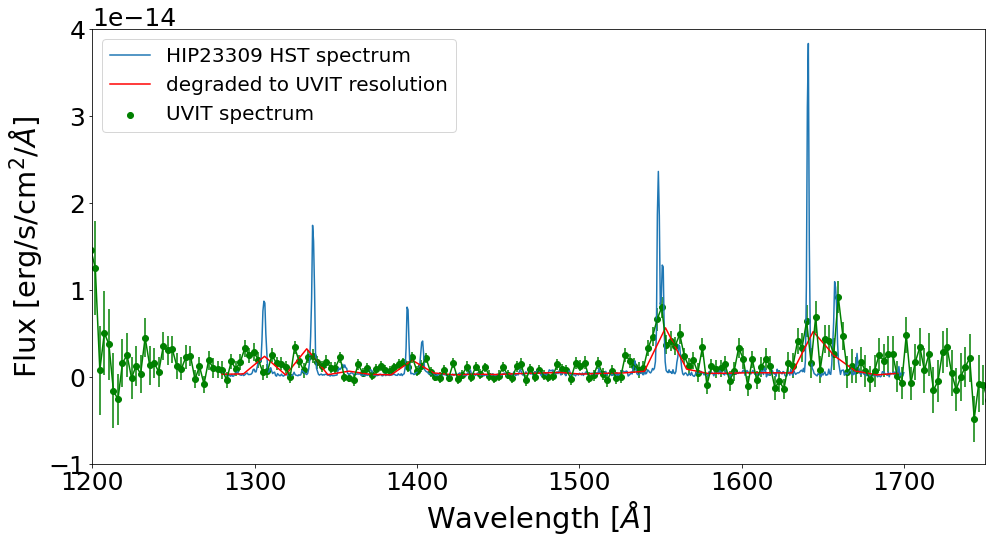

In [32]:
lam = (hip_hst['wavelength'])
flux = hip_hst['flux']

# Set the wavelength and resolution parameters. NUV spectral resolution of UVIT is 13 angstrom
lammin = 1280
lammax = 1700

dl=13

# Construct new low-res wavelength grid

wl, dwl = cg.noise_routines.construct_lam(lammin, lammax, dlam = dl)  ## wavelength resolution

# Down-bin flux to low-res
flr = cg.downbin_spec(flux, lam, wl, dlam=dwl)



# Plot
fig = plt.figure(1, figsize=(16,8), facecolor='white')
m = (lam > lammin) & (lam < lammax)
plt.plot(lam[m], flux[m], label='HIP23309 HST spectrum')
plt.plot(wl, flr, c='r', label='degraded to UVIT resolution')

plt.scatter(HIP23309_FUV['lambda'], HIP23309_FUV['flux'], c='g', label='UVIT spectrum')
plt.errorbar(HIP23309_FUV['lambda'], HIP23309_FUV['flux'], yerr=HIP23309_FUV['flux_err'], c='g')


# plt.yscale("log")
plt.ylim(-1e-14,4e-14)
plt.xlim(1200,1750)
plt.xlabel(r"Wavelength [$\AA$]")
plt.ylabel(r"Flux [erg/s/cm$^2$/$\AA$]");
plt.legend()


plt.savefig('HIP23309_HST_UVIT_FUV_spectra.png')

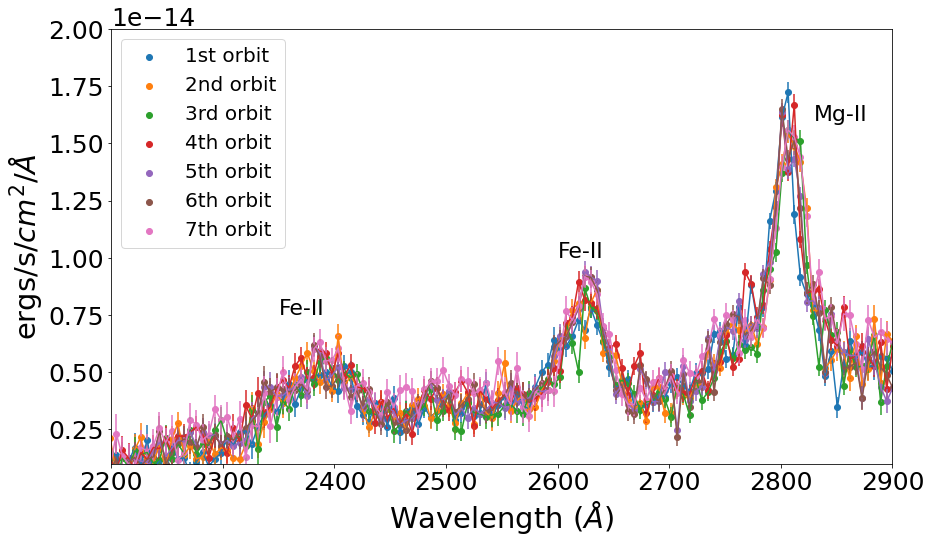

In [35]:
HIP23309_NUV1 = pd.read_csv("~/UVIT_HIP23309/HIP23309_NUV_4168_T01_207T01_9000001720_NUV_Gratingm1_cross_disp_50pixels_spec.dat",
                          delimiter='\s+', names=['lambda', 'flux', 'flux_err']) # start 10:16:44.111110888, end 10:47:18.081329640  2017-11-24, exposure 1778.054
HIP23309_NUV2 = pd.read_csv("~/UVIT_HIP23309/HIP23309_NUV_1019_T01_207T01_9000001720_NUV_Gratingm1_cross_disp_50pixels_spec.dat",
                          delimiter='\s+', names=['lambda', 'flux', 'flux_err']) # start 11:54:11.160188880, end 12:25:06.162442784, exposure 1798.212
HIP23309_NUV3 = pd.read_csv("~/UVIT_HIP23309/HIP23309_NUV_7868_T01_207T01_9000001720_NUV_Gratingm1_cross_disp_50pixels_spec.dat",
                          delimiter='\s+', names=['lambda', 'flux', 'flux_err']) # start 13:31:38.205353824, end 14:02:33.208607728, exposure 1798.101
HIP23309_NUV4 = pd.read_csv("~/UVIT_HIP23309/HIP23309_NUV_4205_T01_207T01_9000001720_NUV_Gratingm1_cross_disp_50pixels_spec.dat",
                          delimiter='\s+', names=['lambda', 'flux', 'flux_err']) # start 15:09:04.742312768, end 15:39:59.219568656, exposure 1797.295
HIP23309_NUV5 = pd.read_csv("~/UVIT_HIP23309/HIP23309_NUV_1054_T01_207T01_9000001720_NUV_Gratingm1_cross_disp_50pixels_spec.dat",
                          delimiter='\s+', names=['lambda', 'flux', 'flux_err']) # start 16:46:31.791574528, end 17:17:26.272828416, exposure 1797.37
HIP23309_NUV6 = pd.read_csv("~/UVIT_HIP23309/HIP23309_NUV_7904_T01_207T01_9000001720_NUV_Gratingm1_cross_disp_50pixels_spec.dat",
                          delimiter='\s+', names=['lambda', 'flux', 'flux_err']) # start 18:23:58.840836224, end 18:54:53.322090112, exposure 1798.28
HIP23309_NUV7 = pd.read_csv("~/UVIT_HIP23309/HIP23309_NUV_6463_T01_207T01_9000001720_NUV_Gratingm1_cross_disp_50pixels_spec.dat",
                          delimiter='\s+', names=['lambda', 'flux', 'flux_err']) # start 20:03:37.602328448, end 20:25:26.148615520, exposure 1260.055


# HIP23309_NUV1.to_csv('HIP23309_NUV_1st_orbit.csv', index=False)
# HIP23309_NUV2.to_csv('HIP23309_NUV_2nd_orbit.csv', index=False)
# HIP23309_NUV3.to_csv('HIP23309_NUV_3rd_orbit.csv', index=False)
# HIP23309_NUV4.to_csv('HIP23309_NUV_4th_orbit.csv', index=False)
# HIP23309_NUV5.to_csv('HIP23309_NUV_5th_orbit.csv', index=False)
# HIP23309_NUV6.to_csv('HIP23309_NUV_6th_orbit.csv', index=False)
# HIP23309_NUV7.to_csv('HIP23309_NUV_7th_orbit.csv', index=False)



plt.figure(1, figsize=(14,8), facecolor='white')
plt.scatter(HIP23309_NUV1['lambda'], HIP23309_NUV1['flux'], label='1st orbit')
plt.errorbar(HIP23309_NUV1['lambda'], HIP23309_NUV1['flux'], yerr=HIP23309_NUV1['flux_err'])
plt.scatter(HIP23309_NUV2['lambda'], HIP23309_NUV2['flux'], label='2nd orbit')
plt.errorbar(HIP23309_NUV2['lambda'], HIP23309_NUV2['flux'], yerr=HIP23309_NUV2['flux_err'])
plt.scatter(HIP23309_NUV3['lambda'], HIP23309_NUV3['flux'], label='3rd orbit')
plt.errorbar(HIP23309_NUV3['lambda'], HIP23309_NUV3['flux'], yerr=HIP23309_NUV3['flux_err'])
plt.scatter(HIP23309_NUV4['lambda'], HIP23309_NUV4['flux'],label='4th orbit')
plt.errorbar(HIP23309_NUV4['lambda'], HIP23309_NUV4['flux'], yerr=HIP23309_NUV4['flux_err'])
plt.scatter(HIP23309_NUV5['lambda'], HIP23309_NUV5['flux'],label='5th orbit')
plt.errorbar(HIP23309_NUV5['lambda'], HIP23309_NUV5['flux'], yerr=HIP23309_NUV5['flux_err'])
plt.scatter(HIP23309_NUV6['lambda'], HIP23309_NUV6['flux'], label='6th orbit')
plt.errorbar(HIP23309_NUV6['lambda'], HIP23309_NUV6['flux'], yerr=HIP23309_NUV6['flux_err'])
plt.scatter(HIP23309_NUV7['lambda'], HIP23309_NUV7['flux'], label='7th orbit')
plt.errorbar(HIP23309_NUV7['lambda'], HIP23309_NUV7['flux'], yerr=HIP23309_NUV7['flux_err'])
plt.xlim(2200,2900)
plt.ylim(0.1e-14,2.0e-14)
plt.legend()
plt.text(2830, 1.6e-14, 'Mg-II', fontsize = 22)
plt.text(2600, 1.0e-14, 'Fe-II', fontsize = 22)
plt.text(2350, 0.75e-14, 'Fe-II', fontsize = 22)
plt.xlabel('Wavelength $(\\AA)$')
plt.ylabel('ergs/s/$cm^2$/$\\AA$')
plt.savefig('HIP23309_NUV_spectra_diff_orbit.png')

In [38]:
file = "~/UVIT_HIP23309/integrated_flux_uvit_band/"
orbit1 = pd.read_csv(file+"phot_HIP23309_NUV_1st_orbit.ascii", comment='#', delimiter='\s+')
orbit2 = pd.read_csv(file+"phot_HIP23309_NUV_2nd_orbit.ascii", comment='#', delimiter='\s+')
orbit3 = pd.read_csv(file+"phot_HIP23309_NUV_3rd_orbit.ascii", comment='#', delimiter='\s+')
orbit4 = pd.read_csv(file+"phot_HIP23309_NUV_4th_orbit.ascii", comment='#', delimiter='\s+')
orbit5 = pd.read_csv(file+"phot_HIP23309_NUV_5th_orbit.ascii", comment='#', delimiter='\s+')
orbit6 = pd.read_csv(file+"phot_HIP23309_NUV_6th_orbit.ascii", comment='#', delimiter='\s+')
orbit7 = pd.read_csv(file+"phot_HIP23309_NUV_7th_orbit.ascii", comment='#', delimiter='\s+')
NUV_combined = pd.read_csv(file+"phot_HIP23309_NUV_UVIT.ascii", comment='#', delimiter='\s+')
FUV_combined = pd.read_csv(file+"phot_HIP23309_FUV_UVIT.ascii", comment='#', delimiter='\s+')
HST_FUV = pd.read_csv(file+"phot_HIP23309_HST_FUV.ascii", comment='#', delimiter='\s+')
NUV_ZP = pd.read_csv(file+"NUV_zero_points.ascii", comment='#', delimiter='\s+')  # zero point flux for diff filters

# FUV

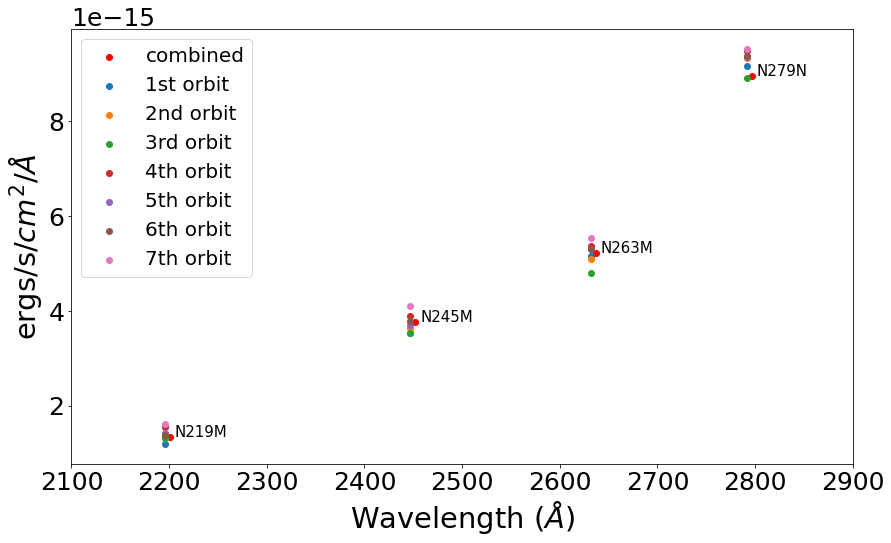

In [45]:
plt.figure(1, figsize=(14,8), facecolor='white')
plt.scatter(NUV_combined['Wavelength']+5, NUV_combined['Flux'], c='r', label='combined' )
plt.scatter(orbit1['Wavelength'], orbit1['Flux'], label='1st orbit')
plt.scatter(orbit2['Wavelength'], orbit2['Flux'], label='2nd orbit')
plt.scatter(orbit3['Wavelength'], orbit3['Flux'], label='3rd orbit')
plt.scatter(orbit4['Wavelength'], orbit4['Flux'], label='4th orbit')
plt.scatter(orbit5['Wavelength'], orbit5['Flux'], label='5th orbit')
plt.scatter(orbit6['Wavelength'], orbit6['Flux'], label='6th orbit')
plt.scatter(orbit7['Wavelength'], orbit7['Flux'], label='7th orbit')

for i, txt in enumerate(NUV_ZP['Filter2']):
    plt.annotate(txt, ( NUV_ZP['Wavelength'][i]+10,NUV['Flux'][i]), fontsize=15)

plt.legend()
plt.xlim(2100,2900)
plt.xlabel('Wavelength $(\\AA)$')
plt.ylabel('ergs/s/$cm^2$/$\\AA$')
plt.savefig('flux_variation_in_diff_filter.png')

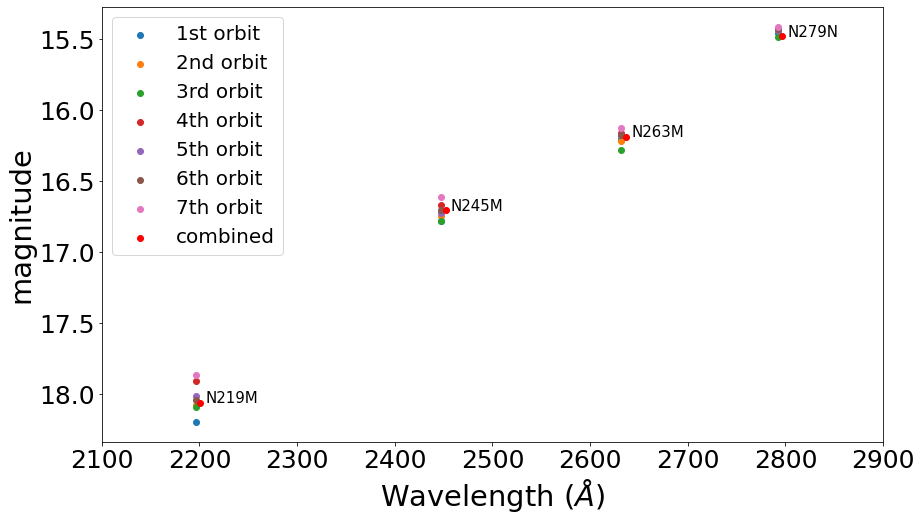

In [41]:
plt.figure(1, figsize=(14,8), facecolor='white')
plt.scatter(orbit1['Wavelength'], -2.5*np.log10(orbit1['Flux']/NUV_ZP['zero_Flux']), label='1st orbit')
plt.scatter(orbit2['Wavelength'], -2.5*np.log10(orbit2['Flux']/NUV_ZP['zero_Flux']), label='2nd orbit')
plt.scatter(orbit3['Wavelength'], -2.5*np.log10(orbit3['Flux']/NUV_ZP['zero_Flux']), label='3rd orbit')
plt.scatter(orbit4['Wavelength'], -2.5*np.log10(orbit4['Flux']/NUV_ZP['zero_Flux']), label='4th orbit')
plt.scatter(orbit5['Wavelength'], -2.5*np.log10(orbit5['Flux']/NUV_ZP['zero_Flux']), label='5th orbit')
plt.scatter(orbit6['Wavelength'], -2.5*np.log10(orbit6['Flux']/NUV_ZP['zero_Flux']), label='6th orbit')
plt.scatter(orbit7['Wavelength'], -2.5*np.log10(orbit7['Flux']/NUV_ZP['zero_Flux']), label='7th orbit')
plt.scatter(NUV_combined['Wavelength']+5, -2.5*np.log10(NUV_combined['Flux']/NUV_ZP['zero_Flux']),c='r', label='combined')

for i, txt in enumerate(NUV_ZP['Filter2']):
    plt.annotate(txt, ( NUV_ZP['Wavelength'][i]+10,-2.5*np.log10(NUV['Flux'][i]/NUV_ZP['zero_Flux'][i])), fontsize=15)

plt.legend()
plt.xlim(2100,2900)
plt.gca().invert_yaxis()
plt.xlabel('Wavelength $(\\AA)$')
plt.ylabel('magnitude')
plt.savefig('mag_variation_in_diff_filter.png')